## Предварительная обработка полученного датасета

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/runa-tic/Data-Analysys-Project-2024/main/cian_offers.csv', encoding="cp1251")
df

,Link,Price,Price per m2,Square,Floor,Floors,Rooms,Is Apartment?,Year,Time to metro,Okrug,District
0,https://www.cian.ru/sale/flat/301800762/,11000000,297297.0,37,5,19,1,False,2017,18,НАО (Новомосковский),Внуковское поселение
1,https://www.cian.ru/sale/flat/301799226/,8990000,281818.0,31.9,24,25,0,True,2017,7,НАО (Новомосковский),Московский
2,https://www.cian.ru/sale/flat/301797595/,10700000,382143.0,28,11,23,0,True,2021,2,НАО (Новомосковский),Внуковское поселение
3,https://www.cian.ru/sale/flat/301796820/,12550181,299527.0,41.9,11,16,2,False,2024,9,НАО (Новомосковский),Сосенское поселение
4,https://www.cian.ru/sale/flat/301796803/,4985475,353580.0,14.1,7,16,0,True,2026,23,НАО (Новомосковский),Сосенское поселение
...,...,...,...,...,...,...,...,...,...,...,...,...
7773,https://www.cian.ru/sale/flat/300797316/,10300000,268229.0,38.4,13,25,1,False,2017,9,ЮВАО,р-н Некрасовка
7774,https://www.cian.ru/sale/flat/301074964/,11500000,378289.0,30.4,8,9,1,False,1972,14,ЮВАО,р-н Текстильщики
7775,https://www.cian.ru/sale/flat/301035853/,10600000,327160.0,32.4,6,9,1,False,1970,5,ЮВАО,р-н Печатники
7776,https://www.cian.ru/sale/flat/296104063/,9530456,238859.0,39.9,5,26,1,False,2022,14,ЮВАО,р-н Некрасовка


__Получен датасет, содержащий 7778 наблюдений и 12 признаков, по продаже квартир в Москве__

Проведем проверку на дубликаты:


In [3]:
df.duplicated().sum()

465

Удалим дубликаты и сохраним первое наблюдение:

In [4]:
df = df.drop_duplicates(keep = 'first')
df.shape

(7313, 12)

Теперь смотрим на полученный датасет в разрезе переменных, их типов, пропусков:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7313 entries, 0 to 7777
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Link           7313 non-null   object 
 1   Price          7313 non-null   int64  
 2   Price per m2   7297 non-null   float64
 3   Square         7313 non-null   object 
 4   Floor          7313 non-null   object 
 5   Floors         7313 non-null   object 
 6   Rooms          7313 non-null   int64  
 7   Is Apartment?  7313 non-null   bool   
 8   Year           7313 non-null   int64  
 9   Time to metro  7313 non-null   object 
 10  Okrug          7313 non-null   object 
 11  District       7313 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 692.7+ KB


Видим, что у некоторых числовых переменных dtype - object, следовательно меняем типы переменных:

In [6]:
df['Square'] = pd.to_numeric(df['Square'], errors='coerce').astype(float)
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce').astype('Int64')  
df['Floors'] = pd.to_numeric(df['Floors'], errors='coerce').astype('Int64') 
df['Time to metro'] = pd.to_numeric(df['Time to metro'], errors='coerce').astype('Int64') 
df = df.dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_2684\2016949978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Square'] = pd.to_numeric(df['Square'], errors='coerce').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_2684\2016949978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce').astype('Int64')
C:\Users\User\AppData\Local\Temp\ipykernel_2684\2016949978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 0 to 7777
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Link           7156 non-null   object 
 1   Price          7156 non-null   int64  
 2   Price per m2   7156 non-null   float64
 3   Square         7156 non-null   float64
 4   Floor          7156 non-null   Int64  
 5   Floors         7156 non-null   Int64  
 6   Rooms          7156 non-null   int64  
 7   Is Apartment?  7156 non-null   bool   
 8   Year           7156 non-null   int64  
 9   Time to metro  7156 non-null   Int64  
 10  Okrug          7156 non-null   object 
 11  District       7156 non-null   object 
dtypes: Int64(3), bool(1), float64(2), int64(3), object(3)
memory usage: 698.8+ KB


Удалили строчки с столбцами, в которых не получилось конвертировать данные в нужный тип, либо с пропущенными значениями, таких наблюдений оказалось немного и на итоговый датасет это не влияет.

__Описание полученных итого переменных:__
* `Link` - ссылка на объявление о продаже

* `Price` - цена продажи

* `Price per m2` - цена за квадратный метр

* `Square` - площадь квартиры в квадратных метрах

* `Floor` - этаж квартиры

* `Floors` - всего этажей в доме

* `Rooms` - комнат в квартире

* `Is Apartment?` - является ли квартира апартаментами

* `Year` - год постройки дома

* `Time to metro` - время до метро (в минутах)

* `Okrug` - округ

* `District` - район

В процессе парсинга было обнаружено, что для некоторых объявлений о продаже квартир (а именно студий), количество комнат может не проставляться в Циан, следовательно, отберем такие строчки:

In [8]:
df['Rooms'].unique()

array([1, 0, 2, 3, 4, 5], dtype=int64)

In [9]:
df[df['Rooms'] == 0].sort_values('Square', ascending = False)

,Link,Price,Price per m2,Square,Floor,Floors,Rooms,Is Apartment?,Year,Time to metro,Okrug,District
518,https://www.cian.ru/sale/flat/301213348/,14000000,140000.0,100.0,1,16,0,True,2020,6,НАО (Новомосковский),Сосенское поселение
1089,https://www.cian.ru/sale/flat/301319494/,26790300,289000.0,92.7,2,4,0,True,1986,19,СЗАО,р-н Покровское-Стрешнево
4355,https://www.cian.ru/sale/flat/301304600/,84018869,1120252.0,75.0,5,7,0,True,1936,8,ЦАО,р-н Хамовники
2327,https://www.cian.ru/sale/flat/301203653/,15180000,220000.0,69.0,17,21,0,True,2014,8,СВАО,р-н Ярославский
7483,https://www.cian.ru/sale/flat/301319506/,11472000,191200.0,60.0,3,4,0,True,1983,11,ЮВАО,р-н Лефортово
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,https://www.cian.ru/sale/flat/301492754/,6190000,606863.0,10.2,1,5,0,True,1956,10,ЦАО,р-н Пресненский
5398,https://www.cian.ru/sale/flat/300265479/,3990000,395050.0,10.1,6,9,0,True,2023,13,ЗелАО,р-н Старое Крюково
4658,https://www.cian.ru/sale/flat/301686902/,3790000,379000.0,10.0,1,2,0,True,1967,17,ВАО,р-н Соколиная гора
7029,https://www.cian.ru/sale/flat/301137202/,1900000,190000.0,10.0,1,5,0,True,1958,7,ЮАО,р-н Нагатино-Садовники


Пройдя по нескольким ссылкам, с сортировкой метража по убыванию удалось выяснить, что все эти строчки относятся к студиям, следовательно - там должна быть 1 комната, поэтому заменяем количество комнат вместо 0 на 1

In [10]:
df['Rooms'].replace(0, 1, inplace = True)
df['Rooms'].value_counts()

1    2631
2    2414
3    1589
4     388
5     134
Name: Rooms, dtype: int64

Посмотрим еще раз на данные, которые лежат в столбцах:

In [11]:
df.describe()

,Price,Price per m2,Square,Floor,Floors,Rooms,Year,Time to metro
count,7.156000e+03,7.156000e+03,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000
mean,2.922736e+07,3.997628e+05,60.382788,8.692566,16.775713,2.019005,1998.889184,10.643097
std,5.382703e+07,2.608955e+05,39.690360,7.642809,11.414930,0.987371,26.385666,5.666290
min,1.300000e+06,2.824100e+04,9.100000,1.000000,1.000000,1.000000,1820.000000,1.000000
25%,1.130000e+07,2.638512e+05,38.000000,3.000000,9.000000,1.000000,1974.000000,6.000000
50%,1.536000e+07,3.251890e+05,50.700000,7.000000,14.000000,2.000000,2010.000000,10.000000
75%,2.500000e+07,4.373418e+05,70.000000,12.000000,22.000000,3.000000,2022.000000,15.000000
max,1.375000e+09,3.676369e+06,779.000000,69.000000,191.000000,5.000000,2028.000000,90.000000


В числовых признаках не видим аномалий, следовательно, датасет готов к дальнейшему анализу, дропнем индексы перед следующим разделом, тк предыдущие преобразования были связаны с удалением строк:

In [12]:
df.reset_index(drop=True)

,Link,Price,Price per m2,Square,Floor,Floors,Rooms,Is Apartment?,Year,Time to metro,Okrug,District
0,https://www.cian.ru/sale/flat/301800762/,11000000,297297.0,37.0,5,19,1,False,2017,18,НАО (Новомосковский),Внуковское поселение
1,https://www.cian.ru/sale/flat/301799226/,8990000,281818.0,31.9,24,25,1,True,2017,7,НАО (Новомосковский),Московский
2,https://www.cian.ru/sale/flat/301797595/,10700000,382143.0,28.0,11,23,1,True,2021,2,НАО (Новомосковский),Внуковское поселение
3,https://www.cian.ru/sale/flat/301796820/,12550181,299527.0,41.9,11,16,2,False,2024,9,НАО (Новомосковский),Сосенское поселение
4,https://www.cian.ru/sale/flat/301796803/,4985475,353580.0,14.1,7,16,1,True,2026,23,НАО (Новомосковский),Сосенское поселение
...,...,...,...,...,...,...,...,...,...,...,...,...
7151,https://www.cian.ru/sale/flat/292524495/,9530456,238859.0,39.9,17,26,1,False,2022,14,ЮВАО,р-н Некрасовка
7152,https://www.cian.ru/sale/flat/300797316/,10300000,268229.0,38.4,13,25,1,False,2017,9,ЮВАО,р-н Некрасовка
7153,https://www.cian.ru/sale/flat/301074964/,11500000,378289.0,30.4,8,9,1,False,1972,14,ЮВАО,р-н Текстильщики
7154,https://www.cian.ru/sale/flat/296104063/,9530456,238859.0,39.9,5,26,1,False,2022,14,ЮВАО,р-н Некрасовка


## Визуализация данных из подготовленного датасета

#### Мы исследуем ценообразование на рынке жилой недвижимости в Москве и хотим проанализировать признаки, влияющие в большей степени на итоговый прайс

Для начала построим гистограмму распределения цены:

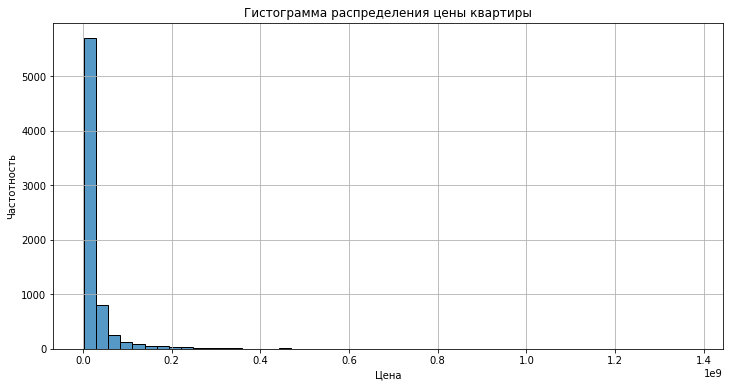

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Price', bins=50)
plt.title('Гистограмма распределения цены квартиры')
plt.xlabel('Цена')
plt.ylabel('Частотность')
plt.grid(True)
plt.show()

Видим, что основная масса предложений на рынке распределена до 30 млн, и это довольно логично, так как в нашем датасете большинство предложений - 1,2 комнатные квартиры и 3комнатные в меньшей степени, построим ящик с усами, чтобы увидеть взаимосвязь между этими переменными:

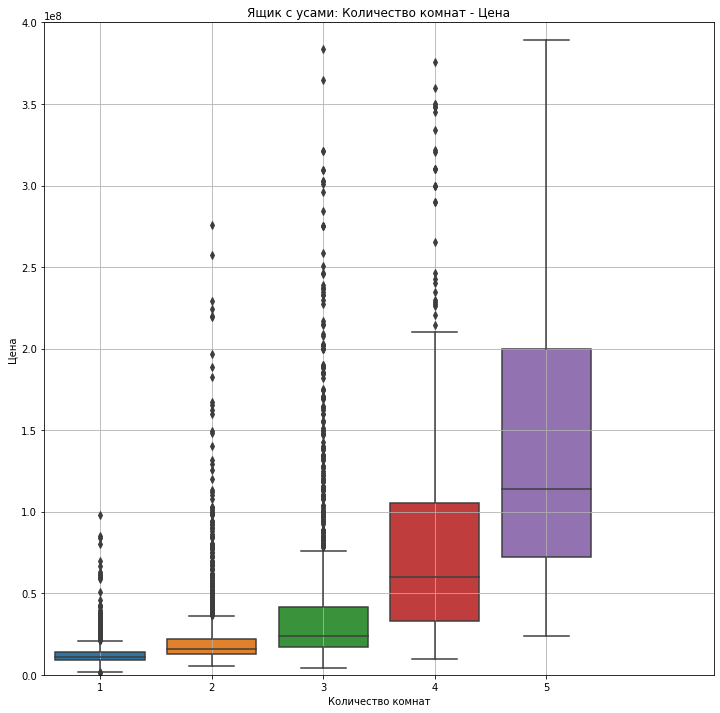

In [14]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df, x='Rooms', y='Price')
plt.title('Ящик с усами: Количество комнат - Цена')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.xlim(-0.5, 5.5)
plt.ylim(0, 400000000)
plt.grid(True)

Видна взаимосвязь между количеством комнат и ценой, однако очевидно, что для детального понимания ценообразования стоит рассмотреть все признаки в совокупности. Также очевидно, что количество квадратных метров - более детальная переменная, нежели количество комнат, поэтому построим аналогичный график для метража.

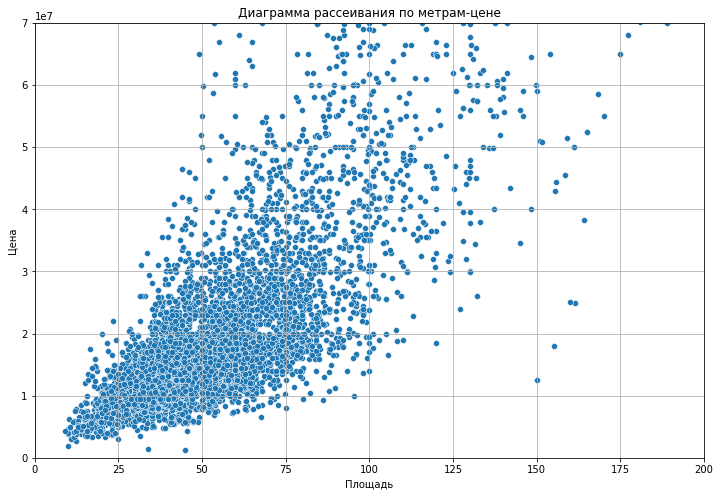

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Square', y='Price')
plt.title('Диаграмма рассеивания по метрам-цене')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.ylim(0, 70000000)
plt.xlim(0, 200)
plt.grid(True)

Видим довольно четкую линейную зависимости между количеством метров и ценой, чего и следовало ожидать, интересно также посмотреть на влияние "время до метро" на цену:

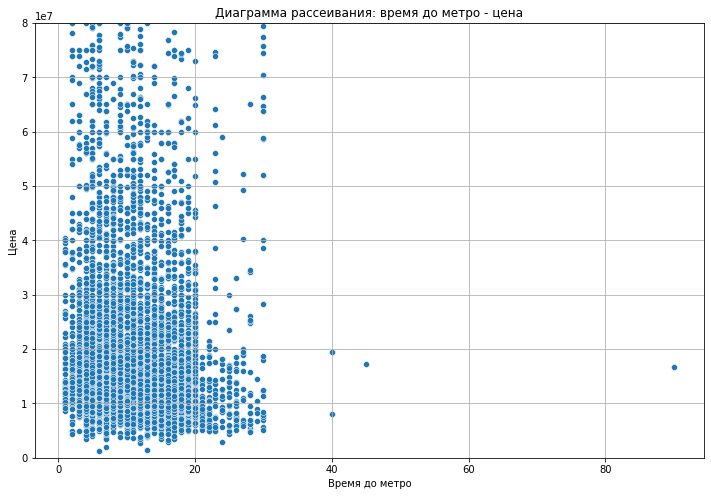

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Time to metro', y='Price')
plt.ylim(0, 80000000)
plt.xlabel('Время до метро')
plt.ylabel('Цена')
plt.title('Диаграмма рассеивания: время до метро - цена')
plt.grid(True)

Логично было бы утверждать, что время до метро обратно пропорционально влияет на стоимость квартиры, однако по диаграмме видно отсутствие зависимости, для проверки этого, а также влияния прочих численных признаков на цену, интересно посмотреть на

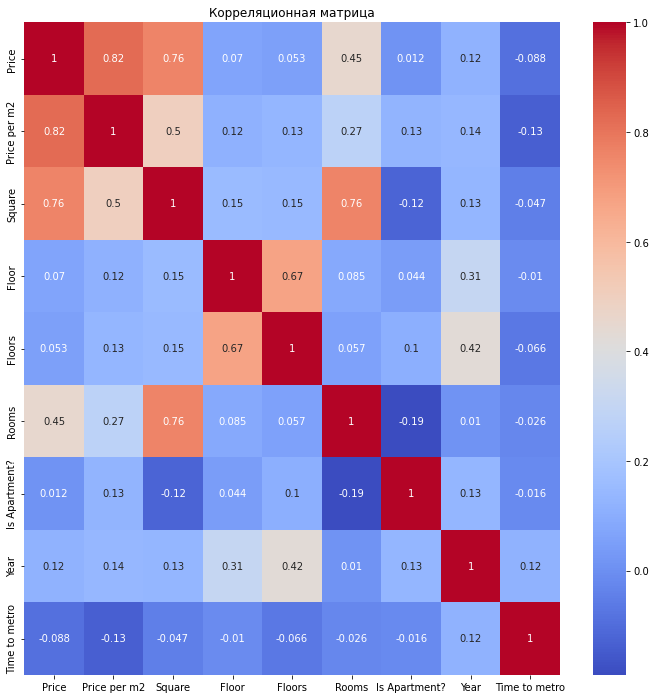

In [17]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(12, 12))
plt.title('Корреляционная матрица')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

__Вывод:__ по матрице видим, что на цену:
* стоимость за квадратный метр оказывает сильное положительное влияние
* площадь оказывает сильное положительное влияние
* количество комнат оказывает умеренное положительное влияние
* остальные признаки оказывают слабое положительное влияние

С помощью корреляционной матрицы мы определили, как числовые переменные влияют на ценообразование, однако у нас есть и категориальные переменные, которые также необходимо проанализировать:

Text(0, 0.5, 'Цена за квадратный метр')

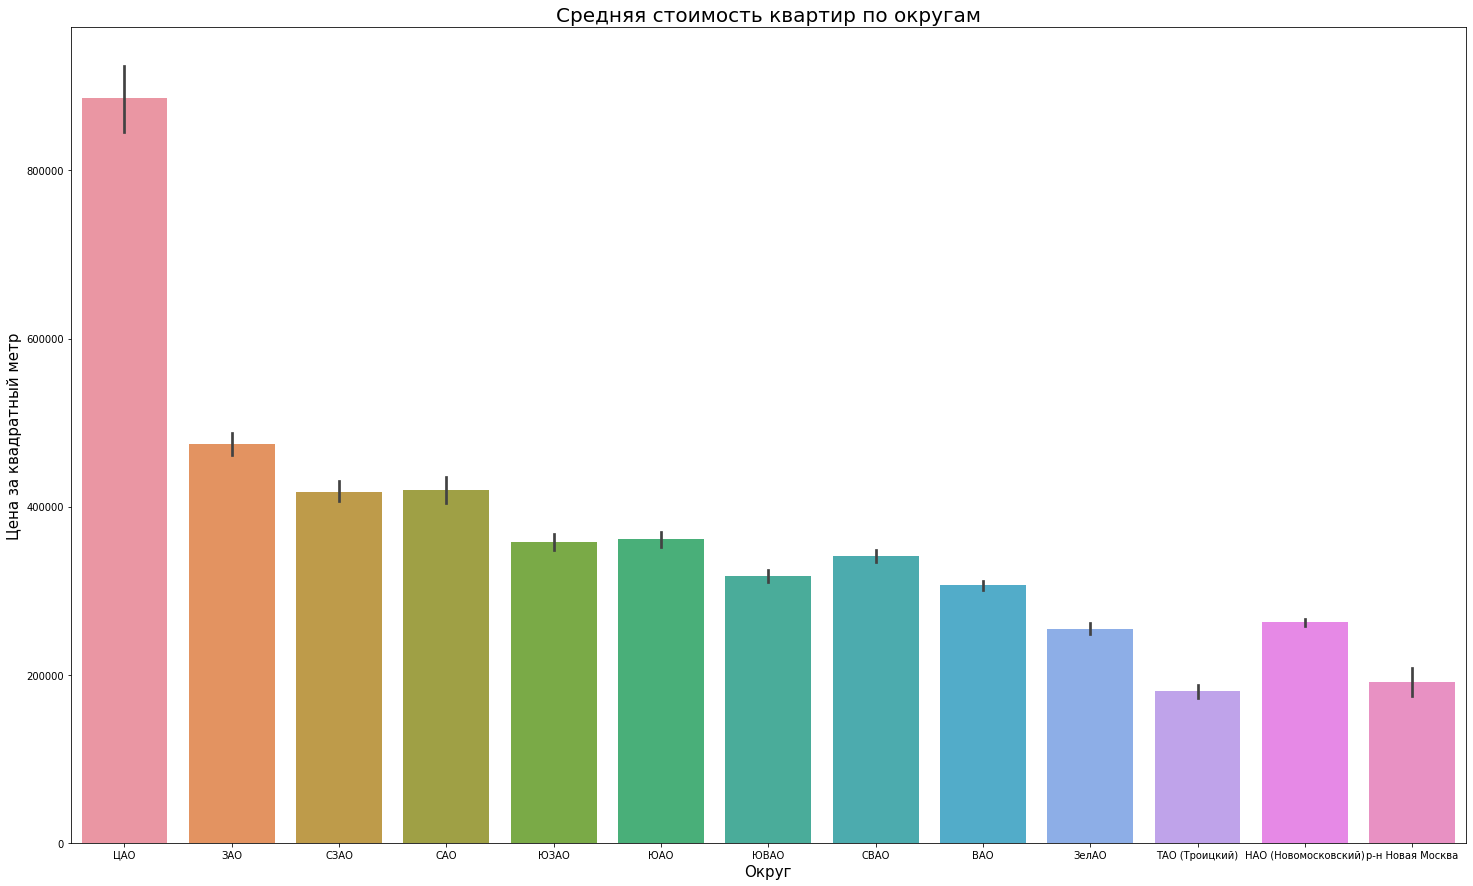

In [18]:
plt.figure(figsize=(25, 15));
sns.barplot(data = df.sort_values('Price per m2', ascending = False), x = 'Okrug', y = 'Price per m2')
plt.title('Средняя стоимость квартир по округам', fontsize = 20)
plt.xlabel('Округ', fontsize = 15)
plt.ylabel('Цена за квадратный метр', fontsize = 15)

Вывод по графику: видно, что наиболее высокая стоимость за квадратный метр наблюдается в ЦАО и ЗАО, которые считаются престижными округами Москвы, что и делает их самыми дорогими, в качестве дальнейшей гипотезы проверим, одинакова ли дисперсия в этих округах

Интересно копнуть дальше в сторону анализа округов и посмотреть есть ли зависимость от времени до метро:

Text(0, 0.5, 'Вемя до метро, мин')

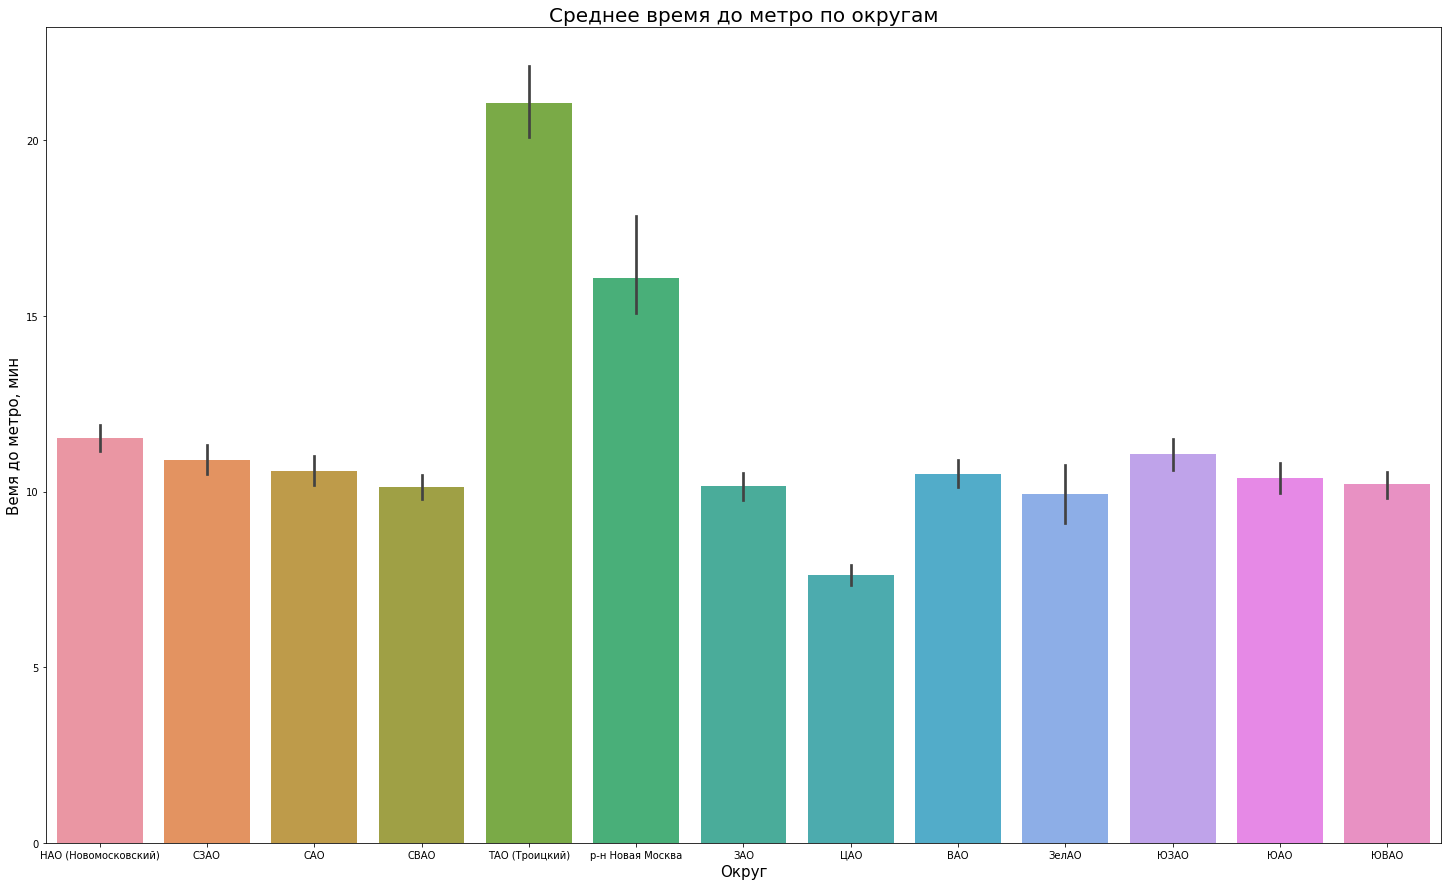

In [19]:
plt.figure(figsize=(25, 15));
sns.barplot(data = df, x = 'Okrug', y = 'Time to metro')
plt.title('Среднее время до метро по округам', fontsize = 20)
plt.xlabel('Округ', fontsize = 15)
plt.ylabel('Вемя до метро, мин', fontsize = 15)

На графике видно, что по самому высокому времени до метро лидируют ТАО и р-н Новая Москва, что абсолютно логично, так как это два единственных административных округа, которые образованы в 2012 году в процессе расширения территории города, и следовательно, метро только развивается в ту сторону, и наименее развито на данный момент.

Более того, лидирует по самому низкому времени до метро ЦАО, что также логично, так как в центре Москвы сконцетрированы множество станций для удобства перемещения по центру.

## Создание новых признаков

#### В качестве гипотезы мы хотим проверить есть ли дисконт за проживание на первом этаж/последнем этаже, для этого создадим 2 дополнительных бинарных столбца:

In [20]:
def IsLastFloor(row):
    if row['Floor'] == row['Floors']:
        return 1
    else:
        return 0
    
def IsFirstFloor(row):
    if row['Floor'] == 1:
        return 1
    else:
        return 0

In [21]:
df['IsLastFloor'] = df.apply(IsLastFloor, axis=1)
df['IsFirstFloor'] = df.apply(IsFirstFloor, axis=1)

Проверим корректность отработки кода

In [22]:
df[df['IsLastFloor'] == 1]

,Link,Price,Price per m2,Square,Floor,Floors,Rooms,Is Apartment?,Year,Time to metro,Okrug,District,IsLastFloor,IsFirstFloor
7,https://www.cian.ru/sale/flat/301792451/,10000000,194932.0,51.3,14,14,1,False,2015,7,НАО (Новомосковский),Коммунарка поселок,1,0
23,https://www.cian.ru/sale/flat/301785087/,10500000,262500.0,40.0,16,16,1,False,2015,3,НАО (Новомосковский),Воскресенское поселение,1,0
29,https://www.cian.ru/sale/flat/301783320/,9300000,242820.0,38.3,14,14,1,False,1972,6,НАО (Новомосковский),Московский,1,0
32,https://www.cian.ru/sale/flat/301779914/,6161342,276293.0,22.3,9,9,1,True,2025,20,НАО (Новомосковский),Кокошкино поселение,1,0
39,https://www.cian.ru/sale/flat/301776700/,15600000,370546.0,42.1,11,11,1,False,2018,20,НАО (Новомосковский),Внуковское поселение,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,https://www.cian.ru/sale/flat/300967755/,9500000,331010.0,28.7,2,2,1,True,2023,13,ЮВАО,р-н Текстильщики,1,0
7745,https://www.cian.ru/sale/flat/300966026/,12200000,259574.0,47.0,12,12,2,False,1981,9,ЮВАО,р-н Люблино,1,0
7749,https://www.cian.ru/sale/flat/300964158/,8400000,254545.0,33.0,9,9,1,False,1978,5,ЮВАО,р-н Кузьминки,1,0
7754,https://www.cian.ru/sale/flat/300961062/,41300000,354202.0,116.6,27,27,4,False,2022,11,ЮВАО,р-н Лефортово,1,0


In [23]:
df[df['IsFirstFloor'] == 1]

,Link,Price,Price per m2,Square,Floor,Floors,Rooms,Is Apartment?,Year,Time to metro,Okrug,District,IsLastFloor,IsFirstFloor
19,https://www.cian.ru/sale/flat/301786105/,7300000,248299.0,29.4,1,14,1,True,2019,13,НАО (Новомосковский),Филимонковское поселение,0,1
25,https://www.cian.ru/sale/flat/301783819/,3900000,164557.0,23.7,1,7,1,True,2021,7,НАО (Новомосковский),Марушкинское поселение,0,1
41,https://www.cian.ru/sale/flat/301776638/,12850000,160625.0,80.0,1,3,3,False,2018,12,НАО (Новомосковский),Филимонковское поселение,0,1
73,https://www.cian.ru/sale/flat/301748115/,12700000,193009.0,65.8,1,6,3,False,2020,11,НАО (Новомосковский),Филимонковское поселение,0,1
79,https://www.cian.ru/sale/flat/301739050/,8250000,266129.0,31.0,1,6,1,False,2021,13,НАО (Новомосковский),Филимонковское поселение,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,https://www.cian.ru/sale/flat/301019656/,10500000,210000.0,50.0,1,14,2,False,1974,7,ЮВАО,р-н Люблино,0,1
7693,https://www.cian.ru/sale/flat/301006866/,10550000,254217.0,41.5,1,5,2,False,1961,12,ЮВАО,р-н Текстильщики,0,1
7711,https://www.cian.ru/sale/flat/300988122/,16000000,168244.0,95.1,1,19,4,False,2012,6,ЮВАО,р-н Некрасовка,0,1
7727,https://www.cian.ru/sale/flat/300976474/,10999999,289474.0,38.0,1,22,1,False,1989,12,ЮВАО,р-н Печатники,0,1


## Потенциальные гипотезы и мл

#### Гипотезы:
1. Есть дисконт в стоимости квартиры на последнем этаже
2. Есть дисконт в стоимости квартиры на первом этаже
3. В апартаментах стоимость квадратного метра меньше чем в квартире

По ml - хотим обучить регрессию (в планах пока что линейную, дальше будет видно)